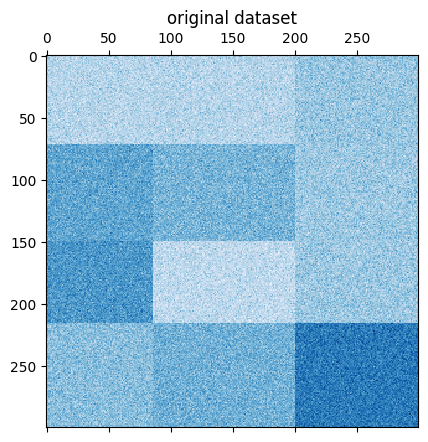

In [3]:
# generate the data
from matplotlib import pyplot as plt
from sklearn.datasets import make_checkerboard
import numpy as np

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("original dataset")
plt.show()

In [4]:
# shuffle data
rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0]) # list of 300 shuffle elements
col_idx_shuffled = rng.permutation(data.shape[1]) # list of 300 shuffle elements

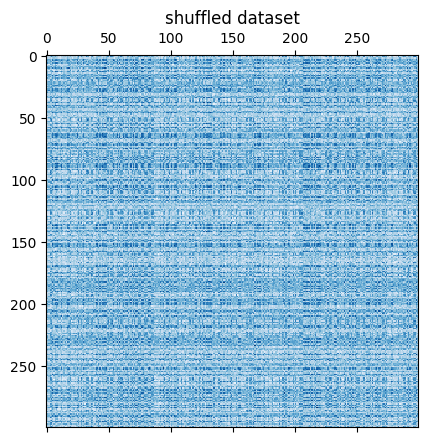

In [5]:
# apply shuffle data
data = data[row_idx_shuffled][:, col_idx_shuffled]
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("shuffled dataset")
plt.show()

In [6]:
# model
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

# compute the similarity of two sets of biclusters
score = consensus_score(model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled]))
print(f"consensus score: {score:.1f}")

consensus score: 1.0


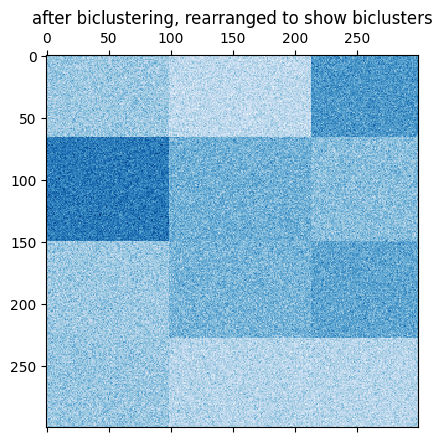

In [7]:
# results
reordered_data = data[np.argsort(model.row_labels_)]
reordered_data = reordered_data[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("after biclustering, rearranged to show biclusters")
plt.show()

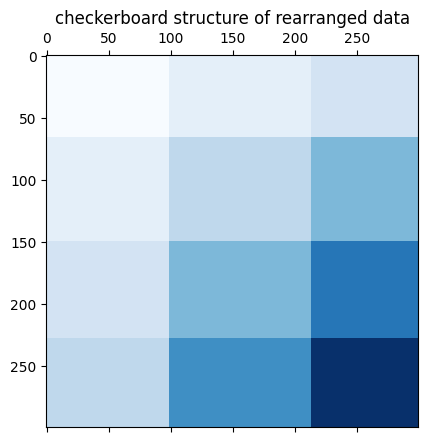

In [8]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("checkerboard structure of rearranged data")
plt.show()

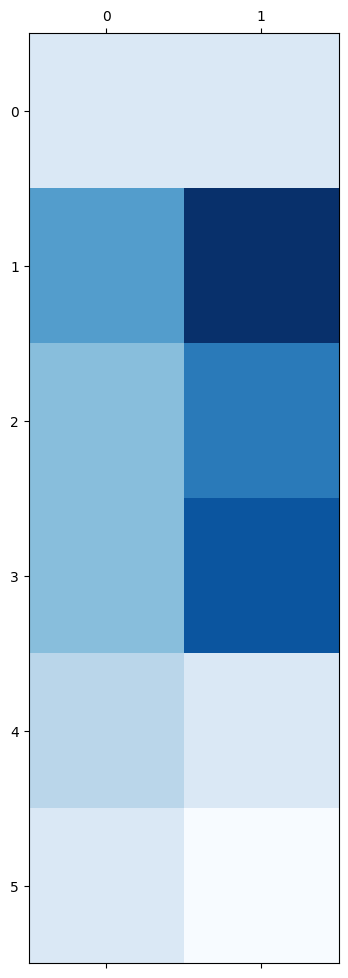

In [9]:
from sklearn.cluster import SpectralCoclustering
import numpy as np
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
clustering = SpectralCoclustering(n_clusters=2, random_state=0).fit(X)
reordered_X = X[np.argsort(clustering.row_labels_)]
reordered_X = reordered_X[:, np.argsort(clustering.column_labels_)]
plt.matshow(reordered_X, cmap=plt.cm.Blues)